# Table of Contents  
   ## 1. Importing libraries and data  
   ## 2. Data cleaning  
   ## 3. Data prep for regression analysis  
   ## 4. Regression analysis 

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create a Path variable
path=r'C:\Users\sands\Documents\03-2023 Airbnb New York'

# Read the Airbnb Listings CSV file
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','Airbnb_cleaned.csv'))

## 2. Data cleaning

In [4]:
df.columns

Index(['Unnamed: 0', 'Id', 'Listing Name', 'Host Id', 'Host Name',
       'Neighbourhood Group', 'Neighbourhood', 'Latitude', 'Longitude',
       'Listing Type', 'Price', 'Minimum Nights', 'Total Reviews',
       'Last Review Date', 'Reviews per Month', 'Host Listings Count',
       'Future Availability', 'Reviews in Last 12 Months'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,Id,Listing Name,Host Id,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Listing Type,Price,Minimum Nights,Total Reviews,Last Review Date,Reviews per Month,Host Listings Count,Future Availability,Reviews in Last 12 Months
0,0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1
1,1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0
2,2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0
3,3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50
4,4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1


In [6]:
df.shape

(41533, 18)

In [7]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0                      0
Id                              0
Listing Name                   13
Host Id                         0
Host Name                       5
Neighbourhood Group             0
Neighbourhood                   0
Latitude                        0
Longitude                       0
Listing Type                    0
Price                           0
Minimum Nights                  0
Total Reviews                   0
Last Review Date             9393
Reviews per Month            9393
Host Listings Count             0
Future Availability             0
Reviews in Last 12 Months       0
dtype: int64

In [8]:
# Check for Duplicates

dups = df.duplicated()

In [9]:
dups.shape # No dups

(41533,)

In [10]:
df.rename(columns = {'Listing Type' : 'room_type','Future Availability' : 'availability_365'}, inplace = True)

In [11]:
# Drop columns that are not required

df = df.drop(columns = ['Unnamed: 0'])

In [12]:
df.columns

Index(['Id', 'Listing Name', 'Host Id', 'Host Name', 'Neighbourhood Group',
       'Neighbourhood', 'Latitude', 'Longitude', 'room_type', 'Price',
       'Minimum Nights', 'Total Reviews', 'Last Review Date',
       'Reviews per Month', 'Host Listings Count', 'availability_365',
       'Reviews in Last 12 Months'],
      dtype='object')

**Question 4: Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.**

C:\Users\sands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

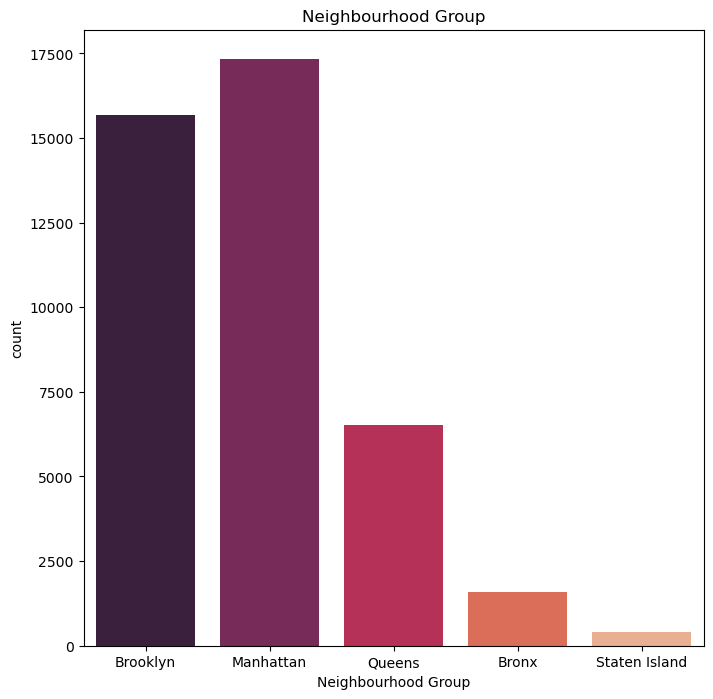

In [19]:
# Plot the Neighbourhoods by listing

sns.countplot(df['Neighbourhood Group'], palette='rocket')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Neighbourhood Group')

C:\Users\sands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Airbnb Room Types')

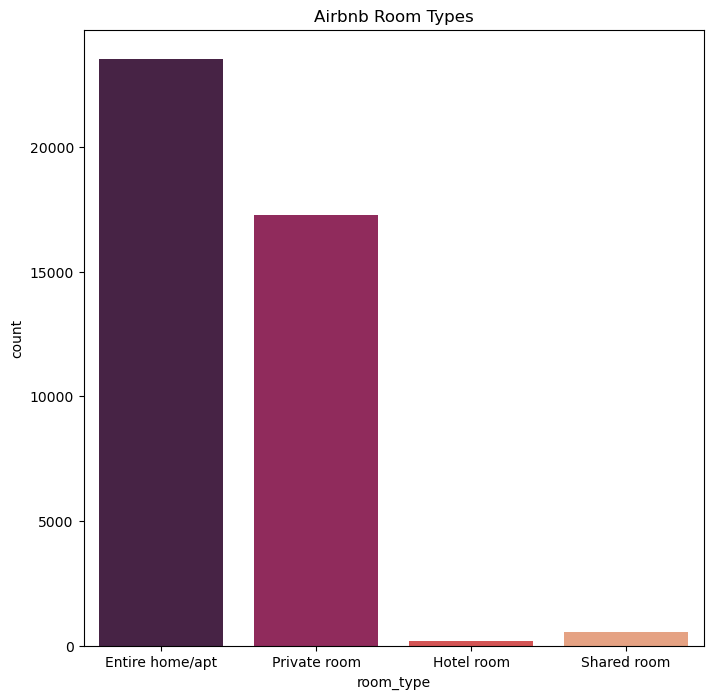

In [20]:
# Plot of Listings Types
sns.countplot(df['room_type'], palette='rocket')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Airbnb Room Types')

C:\Users\sands\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

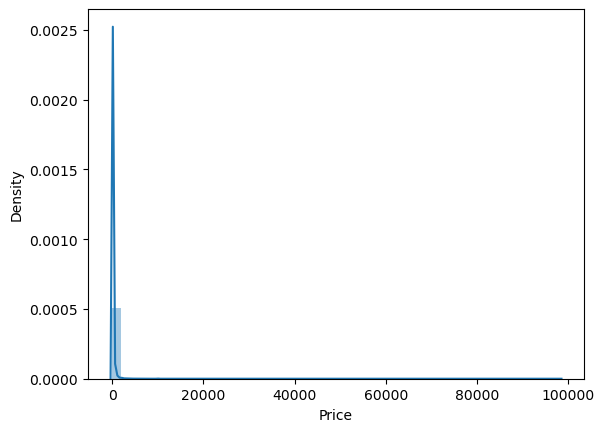

In [14]:
# Create a histogram of the Airbnb Prices

sns.distplot(df['Price'], bins=50) # Shows extreme values

In [22]:
df['Price'].mean() # Check the mean

221.97828232971372

In [23]:
df['Price'].median() # Check the median

131.0

In [24]:
df['Price'].max() # Check the max

98159

C:\Users\sands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


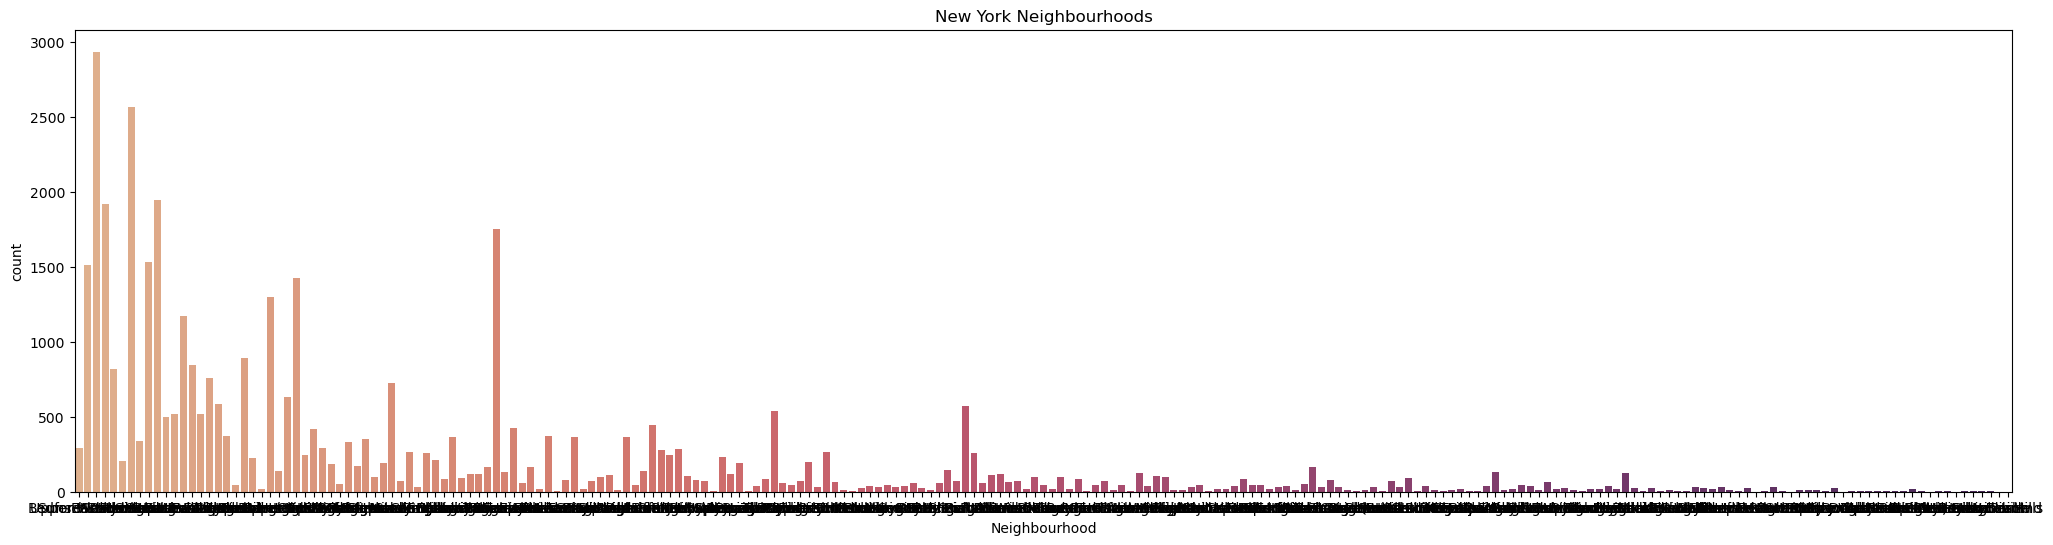

In [26]:
# Plot all the Neighbourhood 

sns.countplot(df['Neighbourhood'], palette='flare')
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('New York Neighbourhoods')

#Save the Plot
plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations','Neighbourhoods.png'))

## 3. Data prep for regression analysis

C:\Users\sands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


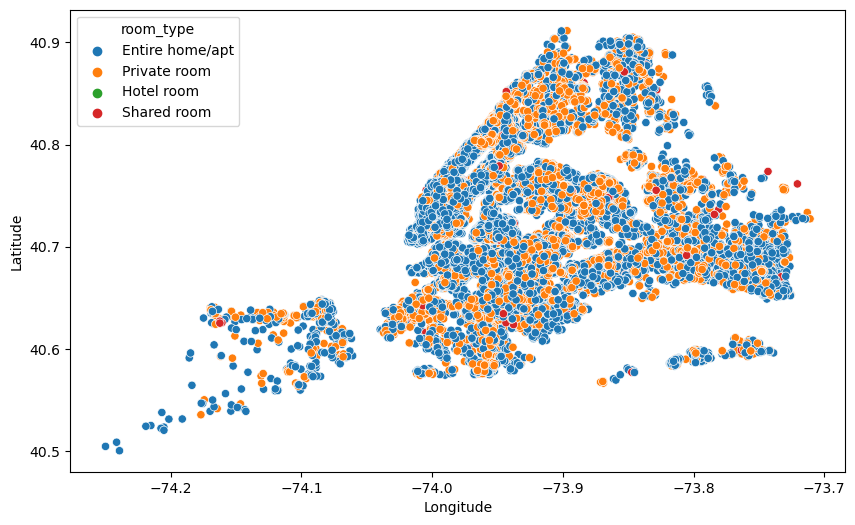

In [27]:
# Plot the room types on the map

plt.figure(figsize=(10,6))
sns.scatterplot(df.Longitude,df.Latitude,hue=df.room_type)
plt.ioff()

C:\Users\sands\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


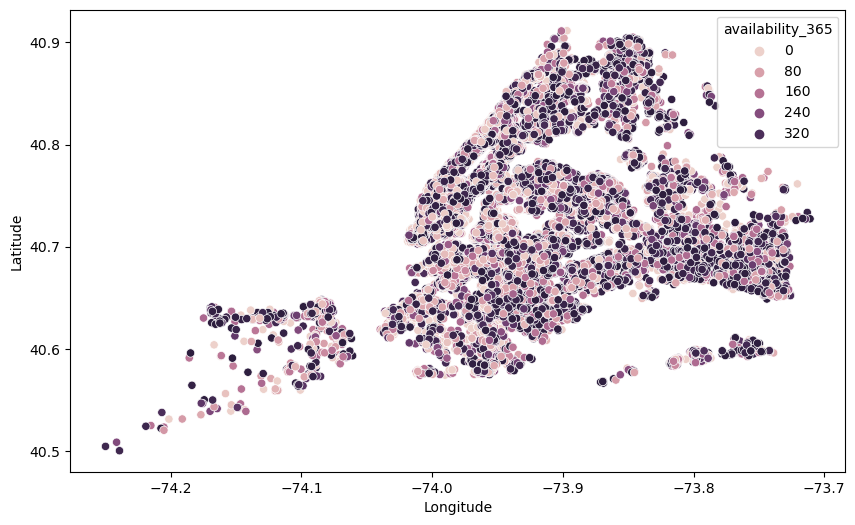

In [28]:
# Plot the Availability of the Room

plt.figure(figsize=(10,6))
sns.scatterplot(df.Longitude,df.Latitude,hue=df.availability_365)

plt.show()

## 4. Regression analysis

**Question 5: State your hypothesis in a markdown cell within your Jupyter notebook.**
>>**Answer: The Price of an Airbnb listing depends on its location(Neighbourhood)**

In [29]:
# Drop the Columns not required for the Regression Analysis
df.drop(['Id','Listing Name','Host Name','Host Id','Latitude','Longitude','Neighbourhood','Total Reviews','Reviews per Month','Last Review Date','Reviews in Last 12 Months'], axis=1, inplace=True)
# Check the df after the changes
df.head(5)

,Neighbourhood Group,room_type,Price,Minimum Nights,Host Listings Count,availability_365
0,Brooklyn,Entire home/apt,275,21,1,267
1,Manhattan,Private room,75,2,1,0
2,Brooklyn,Private room,60,30,2,322
3,Manhattan,Private room,68,2,1,79
4,Manhattan,Entire home/apt,175,30,3,365


In [30]:
#Encode the input Variables Neighbourhood and Room Type as the Regression Model only accepts Numeric Data Type
def Encode(df):
    for column in df.columns[df.columns.isin(['Neighbourhood Group', 'room_type'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [31]:
df_en.head()

,Neighbourhood Group,room_type,Price,Minimum Nights,Host Listings Count,availability_365
0,0,0,275,21,1,267
1,1,1,75,2,1,0
2,0,1,60,30,2,322
3,1,1,68,2,1,79
4,1,0,175,30,3,365


In [32]:
#Defining the independent variables and dependent variables
x = df_en.iloc[:,[0,1,3,4,5]]
y = df_en['Price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

25230    999
8404     150
27437     94
38180     91
40932     41
Name: Price, dtype: int64

In [33]:
x_train.shape

(37379, 5)

In [34]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.019880945682551276

**Train the Regression Model and plot it to view the coefficient**

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_en['Neighbourhood Group'].values.reshape(-1,1)
y = df_en['Price'].values.reshape(-1,1)

In [36]:
X

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [3]], dtype=int64)

In [37]:
y

array([[ 275],
       [  75],
       [  60],
       ...,
       [3888],
       [3888],
       [  80]], dtype=int64)

In [38]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [40]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

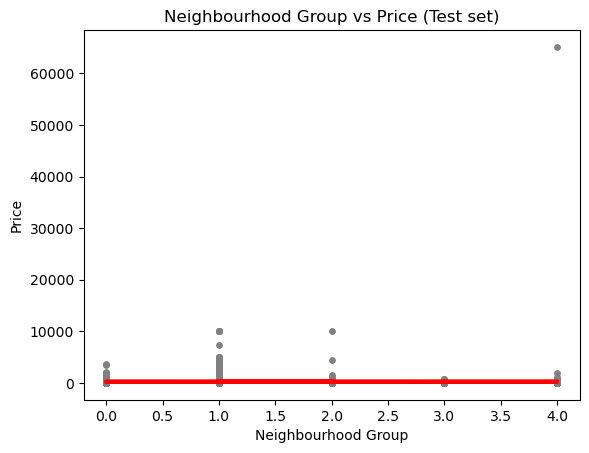

In [42]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Neighbourhood Group vs Price (Test set)')
plot_test.xlabel('Neighbourhood Group')
plot_test.ylabel('Price')
plot_test.show()

**Question 10: Write your own interpretation of how well the line appears to fit the data in a markdown cell.**
>>**Answer: The line is straight and shows that the dependant variable(Price) doesn't change with the independant variable(Neighbourhood Group) at all.**

In [43]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [44]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.14335242]]
Mean squared error:  480053.59197456995
R2 score:  3.7844245446172486e-05


In [45]:
y_predicted

array([[223.2689556 ],
       [224.41230803],
       [223.2689556 ],
       ...,
       [222.12560318],
       [224.41230803],
       [224.41230803]])

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,413,223.268956
1,140,224.412308
2,200,223.268956
3,45,223.268956
4,125,226.699013
5,34,222.125603
6,125,222.125603
7,211,222.125603
8,169,224.412308
9,220,223.268956


**Compare how the regression fits into the Training Set**

In [47]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.14335242]]
Mean squared error:  1002056.9821813426
R2 score:  9.98746069735823e-07


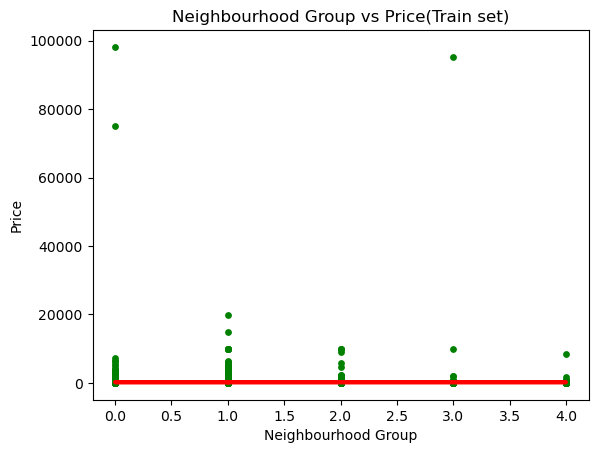

In [50]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Neighbourhood Group vs Price(Train set)')
plot_test.xlabel('Neighbourhood Group')
plot_test.ylabel('Price')
plot_test.show()

**Question 13: Include your thoughts on how well the model performed on the test set in a markdown cell.**
**Include any reflections you have on the impact of possible data bias.**
>>**The model has a very high MSE and R2 meaning it doesn't work very well or that the two varibales are not lineraly related. The varance among price variable is very high which is possibly affecting the results** 